In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import pandas as pd
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/minor project/train.csv")

diagnosis_binary = {
        0: 'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'}

diagnosis_classes = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df["binary"] = df["diagnosis"].map(diagnosis_binary.get)
df["type"] = df["diagnosis"].map(diagnosis_classes.get)

<Axes: >

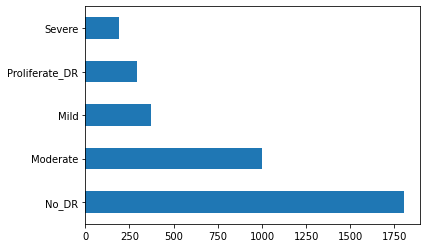

In [ ]:
df['type'].value_counts().plot(kind='barh')

<Axes: >

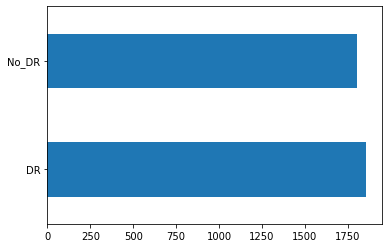

In [ ]:
df['binary'].value_counts().plot(kind='barh')

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
!pip install imutils
from imutils import paths
from sklearn.utils import shuffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = []
labels = []
width,height=224,224

imagePaths = list(paths.list_images('/content/drive/MyDrive/minor project/gaussian_filtered_images'))

data = []
labels = [] 

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]   
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 224, 224, 3)
(3662, 5)


In [ ]:
data = data / 255.0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2929, 224, 224, 3)
Test images: (733, 224, 224, 3)
Train label: (2929, 5)
Test label: (733, 5)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_val.shape)
print("Train label:",y_train.shape)
print("Test label:",y_val.shape)

Train images: (2343, 224, 224, 3)
Test images: (586, 224, 224, 3)
Train label: (2343, 5)
Test label: (586, 5)


In [ ]:
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras import layers
Vgg16 = VGG16(include_top=False, input_shape= (224,224,3)) 

Vgg16.trainable=False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model = Sequential()
model.add(Vgg16)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(32 , activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(5 , activation="sigmoid"))

model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics="binary_accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 1

In [ ]:
#callbacks = [EarlyStopping(monitor='val_binary_accuracy' , patience=10 , restore_best_weights=True)]

history = model.fit(x_train , y_train , epochs=50 , batch_size=64,
                    validation_data=(x_val,y_val), verbose=1)

Epoch 1/50
37/37 [==============================] - 39s 578ms/step - loss: 0.3631 - binary_accuracy: 0.8469 - val_loss: 0.2992 - val_binary_accuracy: 0.8809
Epoch 2/50
37/37 [==============================] - 15s 406ms/step - loss: 0.2784 - binary_accuracy: 0.8904 - val_loss: 0.2756 - val_binary_accuracy: 0.8867
Epoch 3/50
37/37 [==============================] - 18s 482ms/step - loss: 0.2738 - binary_accuracy: 0.8895 - val_loss: 0.2734 - val_binary_accuracy: 0.8840
Epoch 4/50
37/37 [==============================] - 15s 398ms/step - loss: 0.2693 - binary_accuracy: 0.8915 - val_loss: 0.2677 - val_binary_accuracy: 0.8918
Epoch 5/50
37/37 [==============================] - 15s 399ms/step - loss: 0.2549 - binary_accuracy: 0.8977 - val_loss: 0.2692 - val_binary_accuracy: 0.8925
Epoch 6/50
37/37 [==============================] - 14s 393ms/step - loss: 0.2485 - binary_accuracy: 0.8994 - val_loss: 0.2700 - val_binary_accuracy: 0.8928
Epoch 7/50
37/37 [==============================] - 15s 39

In [ ]:
import os.path
if os.path.isfile('nodels/trained_model.h5') is False:
 model.save('models/trained_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('models/trained_model.h5')
new_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 1

1/1 [==============================] - 1s 824ms/step
Predicted: Moderate


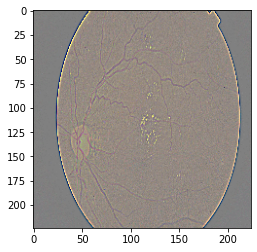

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 
def predict_new(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    from tensorflow.keras.models import load_model
    new_model=load_model('models/trained_model.h5')

    predict=new_model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)
    
    print(f"Predicted: {predictions[pred[0]]}")
predict_new("/content/drive/MyDrive/minor project/gaussian_filtered_images/Moderate/00a8624548a9.png")